In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [10]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [11]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train.shape[1]

28

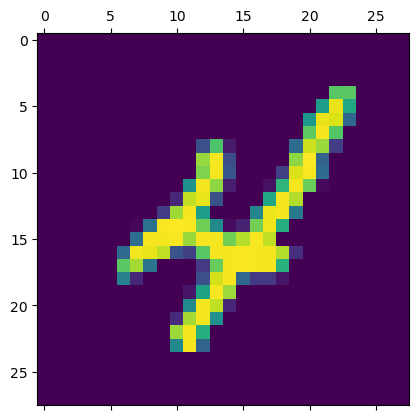

In [20]:
plt.matshow(x_train[9])

In [21]:
x_train = x_train/255
x_test = x_test/255

In [25]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [23]:
x_train_flattened.shape

(60000, 784)

In [24]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [27]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation="sigmoid")
])

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model.fit(x_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4656 - accuracy: 0.8783
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3039 - accuracy: 0.9143
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2732 - accuracy: 0.9238
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2666 - accuracy: 0.9260
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2621 - accuracy: 0.9271
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2584 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2552 - accuracy: 0.9288
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2534 - accuracy: 0.9295
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.250

In [28]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2708 - accuracy: 0.9237


[0.2708253562450409, 0.9236999750137329]

In [29]:
y_predict = model.predict(x_test_flattened)
y_predict[0]

313/313 [==============================] - 1s 2ms/step


array([7.2086751e-03, 2.7322221e-08, 1.7370472e-02, 9.7856885e-01,
       1.8929907e-03, 2.0585248e-01, 3.8079364e-08, 9.9989295e-01,
       7.7266388e-02, 6.4226264e-01], dtype=float32)

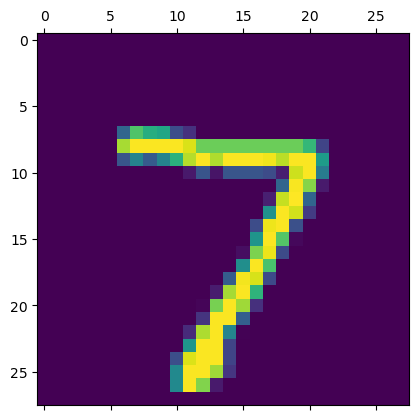

In [30]:
plt.matshow(x_test[0])

In [31]:
np.argmax(y_predict[0])

7

In [32]:
y_predict_label = [np.argmax(i) for i in y_predict]

In [33]:
y_predict_label[:5]

[7, 2, 1, 0, 4]

In [40]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predict_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   9,    9,  918,   23,    7,    4,   13,    8,   38,    3],
       [   3,    0,   11,  928,    1,   33,    3,    9,   16,    6],
       [   1,    2,    4,    2,  917,    0,   10,    6,    9,   31],
       [   9,    2,    3,   33,    9,  788,   14,    7,   23,    4],
       [  13,    3,    9,    1,    7,   15,  908,    1,    1,    0],
       [   2,    8,   21,    8,    6,    1,    0,  951,    2,   29],
       [  11,   13,    6,   33,    9,   42,   10,   10,  830,   10],
       [  11,    8,    1,   14,   29,    8,    0,   22,    1,  915]])>

Text(50.722222222222214, 0.5, 'Truth')

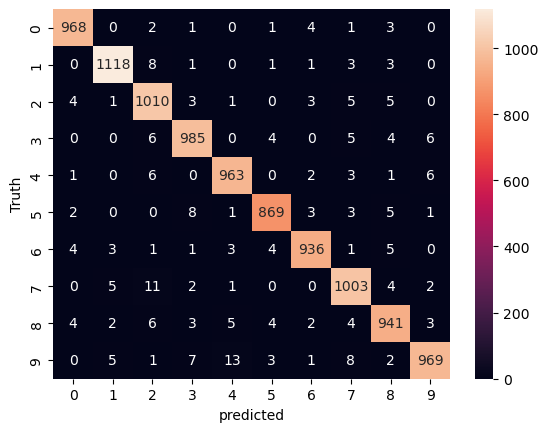

In [56]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")

# Hidden layer

In [47]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2726 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1247 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0862 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0660 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0513 - accuracy: 0.9840


In [49]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0762 - accuracy: 0.9762


[0.07622097432613373, 0.9761999845504761]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

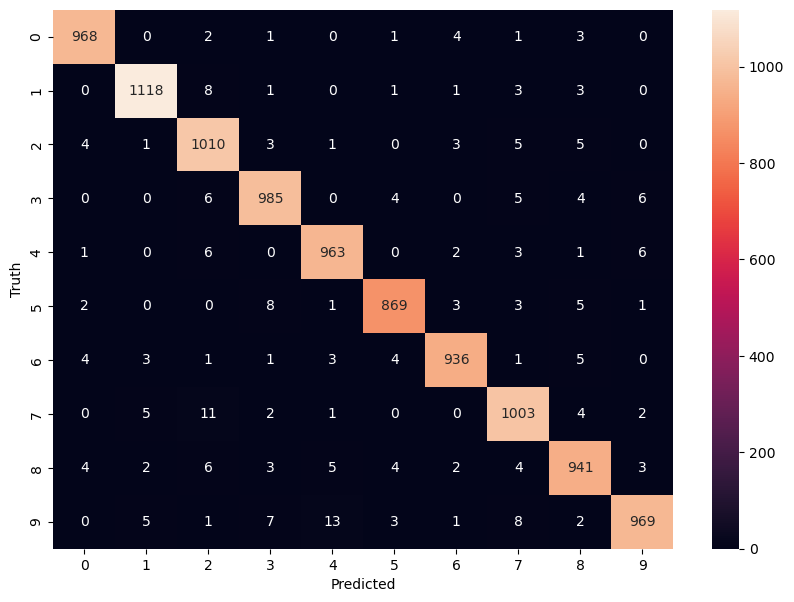

In [51]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2729 - accuracy: 0.9236
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1214 - accuracy: 0.9653
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0833 - accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0634 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0499 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0402 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0339 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0269 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0227 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

In [55]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0963 - accuracy: 0.9737


[0.09631264954805374, 0.9736999869346619]